<a href="https://colab.research.google.com/github/AICE2024/Macroeconomics/blob/main/exercise_04_developing_and_graphing_linear_equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Developing and Graphing Linear Equations (Unit 03)
*   Click the little 'PLAY' icon below!
*   Wait
*   Enter your 8-digit student ID in the box provided to solve the problem.



Enter your 8-digit Student ID: 66110035

Demand Equation: Pd = 13 - 1.5Qd
Supply Equation: Ps = 5 + 2.0Qs

Equilibrium Price (Pe): 9.57
Equilibrium Quantity (Qe): 2.29

New Price (P_new): 11.68
Quantity Demanded (Qd_new): 0.88
Quantity Supplied (Qs_new): 3.34
The government created a surplus of 2.46 units.


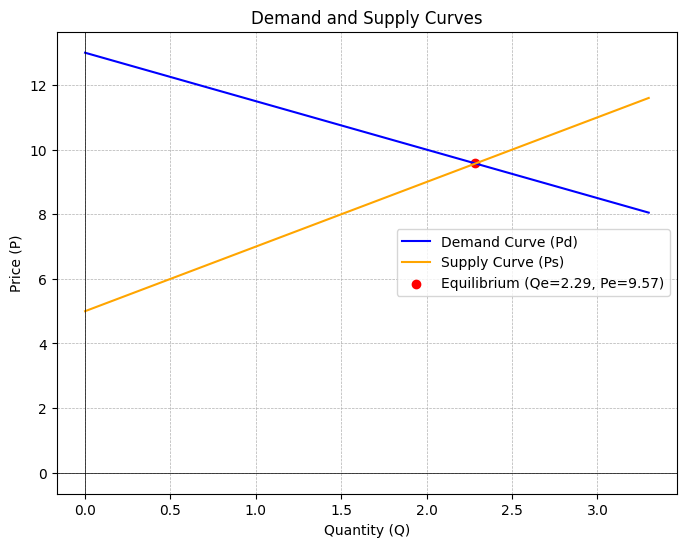


Do you want to enter a new Student ID? (yes/no): yes


In [ ]:
# @title 'PLAY' icon here below
import matplotlib.pyplot as plt
import sys

def get_student_id():
    attempts = 0
    while attempts < 3:
        student_id = input("Enter your 8-digit Student ID: ")
        if student_id.isdigit() and len(student_id) == 8:
            return student_id
        else:
            print("Invalid input. Please enter an 8-digit number.")
        attempts += 1
    print("Too many invalid attempts. Exiting...")
    sys.exit()

def reduce_to_single_digit(number):
    while number >= 10:
        number = sum(int(digit) for digit in str(number))
    return number

def calculate_parameters(student_id):
    first_six = reduce_to_single_digit(sum(int(digit) for digit in student_id[:6]))
    last_four = reduce_to_single_digit(sum(int(digit) for digit in student_id[-4:]))
    a1 = max(first_six, last_four)
    a2 = min(first_six, last_four)
    a1 = a1 + a2
    last_digit = int(student_id[-1])
    b1, b2 = (1.5, 2.0) if last_digit % 2 == 1 else (2.0, 1.5)
    return a1, a2, b1, b2

def calculate_equilibrium(a1, a2, b1, b2):
    qe = (a1 - a2) / (b1 + b2)
    pe = a1 - b1 * qe
    return qe, pe

def calculate_policy_impact(a1, a2, b1, b2, pe, last_digit):
    if last_digit % 2 == 1:
        p_new = pe * 1.22  # Price floor: 22% above Pe
    else:
        p_new = pe * 0.73  # Price ceiling: 27% below Pe
    qd_new = (a1 - p_new) / b1
    qs_new = (p_new - a2) / b2
    surplus_or_shortage = abs(qs_new - qd_new)
    result_type = "surplus" if qs_new > qd_new else "shortage"
    return p_new, qd_new, qs_new, result_type, surplus_or_shortage

def plot_graph(a1, a2, b1, b2, qe, pe):
    q_values = [i * 0.1 for i in range(0, int(qe * 1.5 * 10))]
    pd_values = [a1 - b1 * q for q in q_values]
    ps_values = [a2 + b2 * q for q in q_values]

    plt.figure(figsize=(8, 6))
    plt.plot(q_values, pd_values, label="Demand Curve (Pd)", color="blue")
    plt.plot(q_values, ps_values, label="Supply Curve (Ps)", color="orange")
    plt.scatter(qe, pe, color="red", label=f"Equilibrium (Qe={qe:.2f}, Pe={pe:.2f})")
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.title("Demand and Supply Curves")
    plt.xlabel("Quantity (Q)")
    plt.ylabel("Price (P)")
    plt.legend()
    plt.show()

def main():
    while True:
        student_id = get_student_id()
        a1, a2, b1, b2 = calculate_parameters(student_id)

        print(f"\nDemand Equation: Pd = {a1} - {b1}Qd")
        print(f"Supply Equation: Ps = {a2} + {b2}Qs\n")

        qe, pe = calculate_equilibrium(a1, a2, b1, b2)
        print(f"Equilibrium Price (Pe): {pe:.2f}")
        print(f"Equilibrium Quantity (Qe): {qe:.2f}\n")

        last_digit = int(student_id[-1])
        p_new, qd_new, qs_new, result_type, surplus_or_shortage = calculate_policy_impact(a1, a2, b1, b2, pe, last_digit)

        print(f"New Price (P_new): {p_new:.2f}")
        print(f"Quantity Demanded (Qd_new): {qd_new:.2f}")
        print(f"Quantity Supplied (Qs_new): {qs_new:.2f}")
        print(f"The government created a {result_type} of {surplus_or_shortage:.2f} units.")

        plot_graph(a1, a2, b1, b2, qe, pe)

        repeat = input("\nDo you want to enter a new Student ID? (yes/no): ").strip().lower()
        if repeat != "yes":
            print("Goodbye!")
            break

if __name__ == "__main__":
    main()

